In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [49]:
import pathlib
data_dir = pathlib.Path('/content/drive/MyDrive/deepcv_apple_quadrant/quadrant').with_suffix('')

In [50]:
image_count = len(list(data_dir.glob('*/*.jpg')))
print(image_count)

400


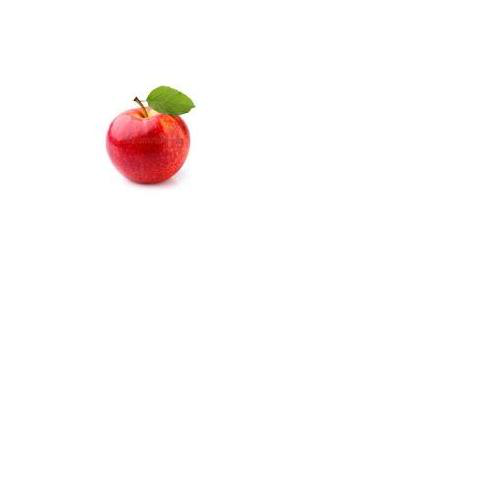

In [51]:
import PIL
import PIL.Image
apples = list(data_dir.glob('1/*'))
PIL.Image.open(str(apples[0]))

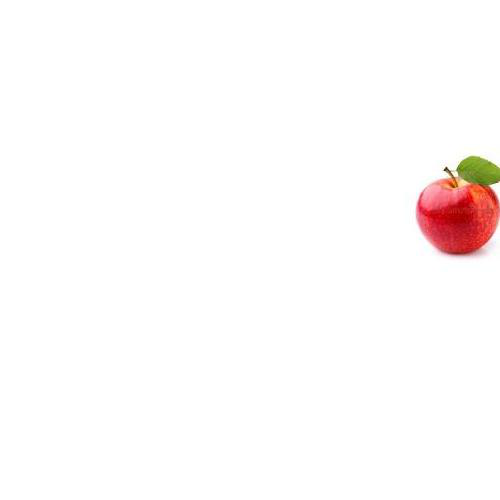

In [52]:
import PIL
import PIL.Image
apples = list(data_dir.glob('2/*'))
PIL.Image.open(str(apples[0]))

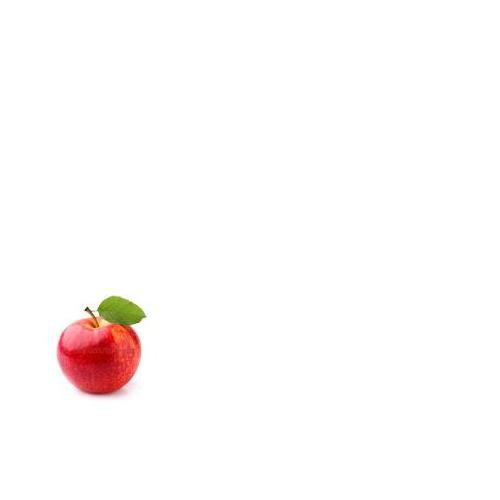

In [53]:
import PIL
import PIL.Image
apples = list(data_dir.glob('3/*'))
PIL.Image.open(str(apples[0]))

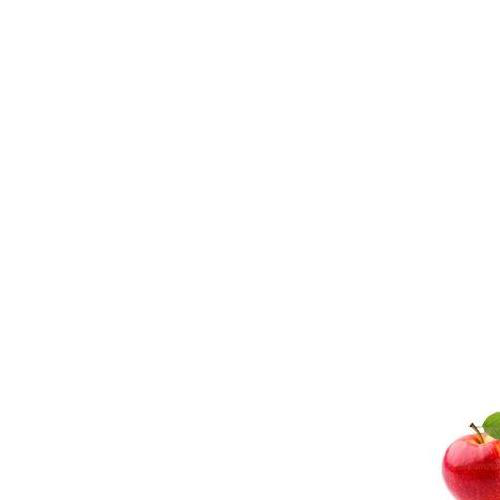

In [59]:
import PIL
import PIL.Image
apples = list(data_dir.glob('4/*'))
PIL.Image.open(str(apples[0]))

In [60]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Define the directories containing the training and validation data
train_dir = data_dir

# Define the image size and batch size
batch_size = 32
img_height = 224
img_width = 224
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
val_ds = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)
# Define the CNN architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(train_ds, epochs=10, validation_data=val_ds)

Found 400 files belonging to 4 classes.
Using 320 files for training.
Found 400 files belonging to 4 classes.
Using 80 files for validation.
Epoch 1/10
10/10 [==============================] - 3s 118ms/step - loss: -89855.2812 - accuracy: 0.2625 - val_loss: -567971.8125 - val_accuracy: 0.2000
Epoch 2/10
10/10 [==============================] - 2s 95ms/step - loss: -2158805.5000 - accuracy: 0.2625 - val_loss: -8635376.0000 - val_accuracy: 0.2000
Epoch 3/10
10/10 [==============================] - 1s 76ms/step - loss: -24098310.0000 - accuracy: 0.2625 - val_loss: -66307320.0000 - val_accuracy: 0.2000
Epoch 4/10
10/10 [==============================] - 1s 77ms/step - loss: -116215152.0000 - accuracy: 0.2625 - val_loss: -320112224.0000 - val_accuracy: 0.2000
Epoch 5/10
10/10 [==============================] - 1s 75ms/step - loss: -550900096.0000 - accuracy: 0.2625 - val_loss: -1174743552.0000 - val_accuracy: 0.2000
Epoch 6/10
10/10 [==============================] - 1s 74ms/step - loss: -1

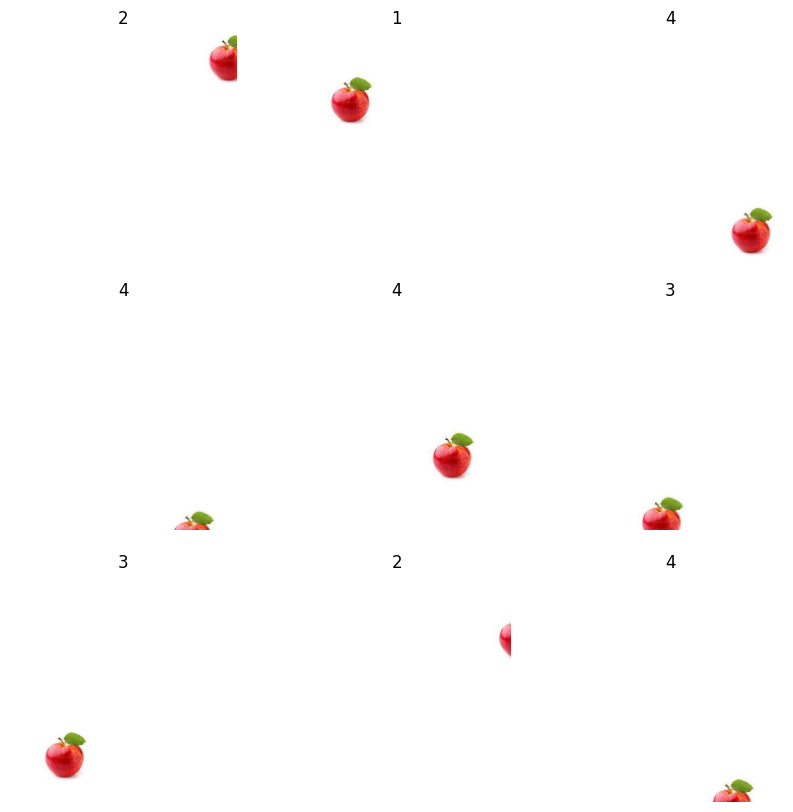

In [61]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [62]:
# Evaluate the model on the validation set
score = model.evaluate(val_ds)
print(f"Validation Loss: {score[0]}, Validation Accuracy: {score[1]}")

3/3 [==============================] - 0s 19ms/step - loss: -80814882816.0000 - accuracy: 0.2000
Validation Loss: -80814882816.0, Validation Accuracy: 0.20000000298023224


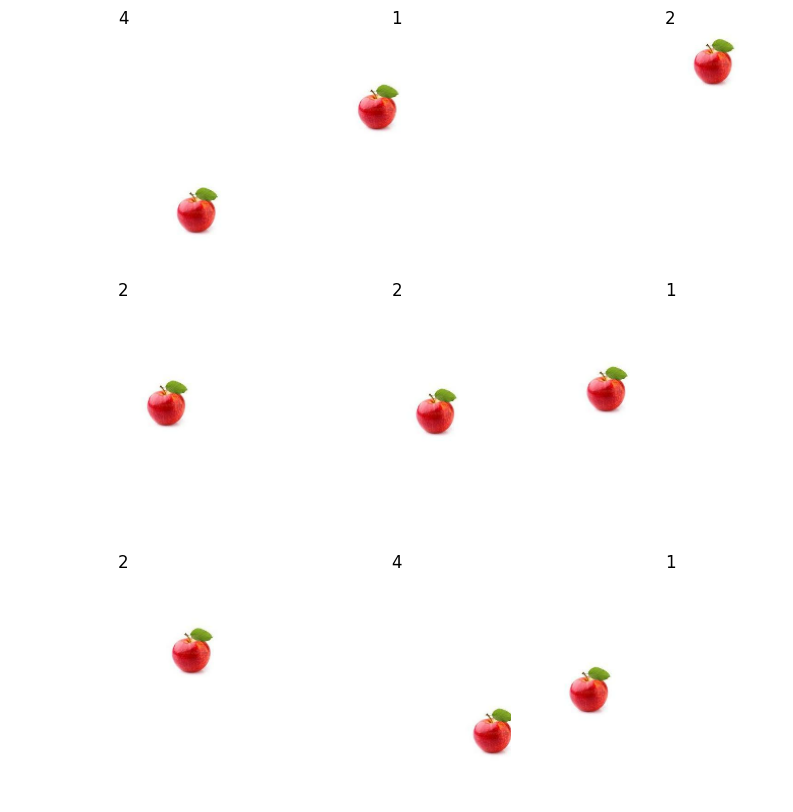

In [63]:
import matplotlib.pyplot as plt
class_names = val_ds.class_names
plt.figure(figsize=(10, 10))
for images, labels in val_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")